**Exploratory Data Analysis**

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading CSV using Pandas and storing in dataframe       
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
display(df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38,1,155000.00,1.10,143,1,1,270,0
295,55.00,0,1820,0,38,0,270000.00,1.20,139,0,0,271,0
296,45.00,0,2060,1,60,0,742000.00,0.80,138,0,0,278,0
297,45.00,0,2413,0,38,0,140000.00,1.40,140,1,1,280,0


In [3]:
#Data Info
df.shape

(299, 13)

In [4]:
#Columns of the dataset
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
#Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### **Finding the null values in the Dataset**

In [6]:
# detect null values
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#count missing values in each row and column
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

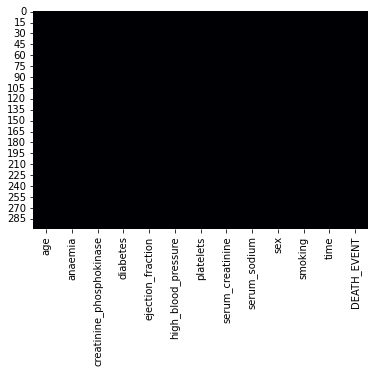

In [8]:
#Heatmap for null values 
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);



*   **No null values** are present in the data



### **Dividing features into Numerical and Categorical**

In [9]:
#Printing out numerical and categorical features
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time



*   If the the attribute has less than 6 unique elements, then it is a Categorical Feature or else it is a Numerical Feature.
 
*   This typical approach for division of features can also be based on the datatypes of the elements of the respective attribute.



**Converting the datatypes of age and platelets features**

In [10]:
#Converting datatypes of age and platelets features from float to integer
df['age'] = df['age'].astype(int)
df['platelets'] = df['platelets'].astype(int)
df1 = df.copy(deep = True)

### **Descriptive Statistical Analysis of Numerical Features**


In [11]:
#Taking only the Numerical Features
df2 = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']].copy()
display(df2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75,582,20,265000,1.90,130,4
1,55,7861,38,263358,1.10,136,6
2,65,146,20,162000,1.30,129,7
3,50,111,20,210000,1.90,137,7
4,65,160,20,327000,2.70,116,8
...,...,...,...,...,...,...,...
294,62,61,38,155000,1.10,143,270
295,55,1820,38,270000,1.20,139,271
296,45,2060,60,742000,0.80,138,278
297,45,2413,38,140000,1.40,140,280



> **Finding the following for Descriptive Statistical Analysis:**


* Mean
* Median
* Standard Deviation
* Variance
* Minimum
* Maximum
* Skewness
* Kurtosis



In [12]:
#Mean
df2.mean()

age                            60.83
creatinine_phosphokinase      581.84
ejection_fraction              38.08
platelets                  263358.03
serum_creatinine                1.39
serum_sodium                  136.63
time                          130.26
dtype: float64

In [13]:
#Median
df2.median()

age                            60.00
creatinine_phosphokinase      250.00
ejection_fraction              38.00
platelets                  262000.00
serum_creatinine                1.10
serum_sodium                  137.00
time                          115.00
dtype: float64

In [14]:
#Standard Deviation
df2.std()

age                           11.89
creatinine_phosphokinase     970.29
ejection_fraction             11.83
platelets                  97804.24
serum_creatinine               1.03
serum_sodium                   4.41
time                          77.61
dtype: float64

In [15]:
#Variance
df2.var()

age                               141.49
creatinine_phosphokinase       941458.57
ejection_fraction                 140.06
platelets                  9565668749.45
serum_creatinine                    1.07
serum_sodium                       19.47
time                             6023.97
dtype: float64

In [16]:
#Minimum
df2.min()

age                           40.00
creatinine_phosphokinase      23.00
ejection_fraction             14.00
platelets                  25100.00
serum_creatinine               0.50
serum_sodium                 113.00
time                           4.00
dtype: float64

In [17]:
#Maximum
df2.max()

age                            95.00
creatinine_phosphokinase     7861.00
ejection_fraction              80.00
platelets                  850000.00
serum_creatinine                9.40
serum_sodium                  148.00
time                          285.00
dtype: float64

In [18]:
#Skewness
df2.skew()

age                         0.42
creatinine_phosphokinase    4.46
ejection_fraction           0.56
platelets                   1.46
serum_creatinine            4.46
serum_sodium               -1.05
time                        0.13
dtype: float64

*   If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
*   If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
*  If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed. 



In [19]:
#Kurtosis
df2.kurtosis()

age                        -0.18
creatinine_phosphokinase   25.15
ejection_fraction           0.04
platelets                   6.21
serum_creatinine           25.83
serum_sodium                4.12
time                       -1.21
dtype: float64

### **Distribution of Categorical Features**

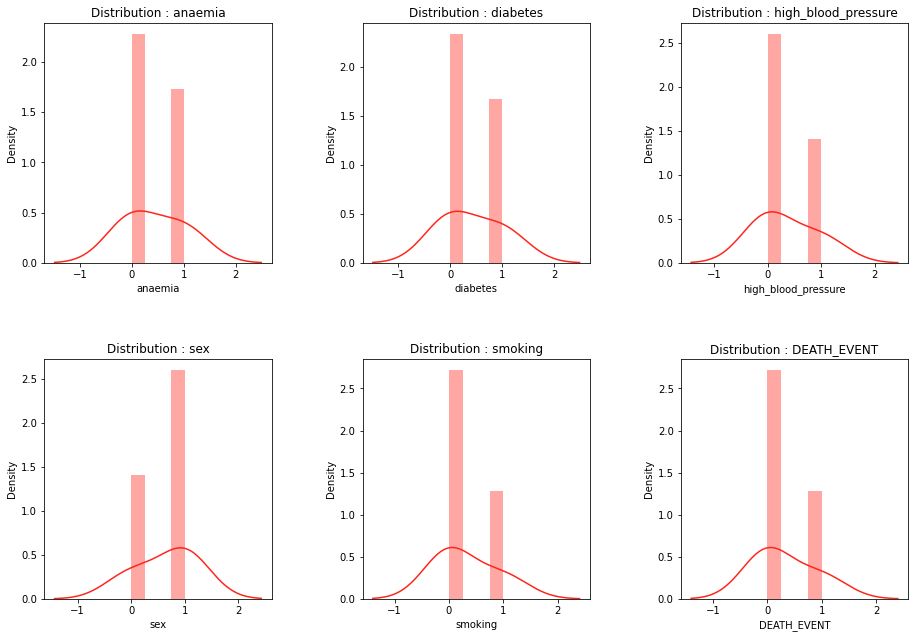

In [20]:
colors = ['#FE251B','#FFFFFF']
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (15,10))
plt.subplots_adjust(left=0.1,\
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(len(categorical_features)):
    
    plt.subplot(2,3,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0])
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)



*   All the categorical features are **Normally Distributed**.




### **Distribution of Numerical Features**

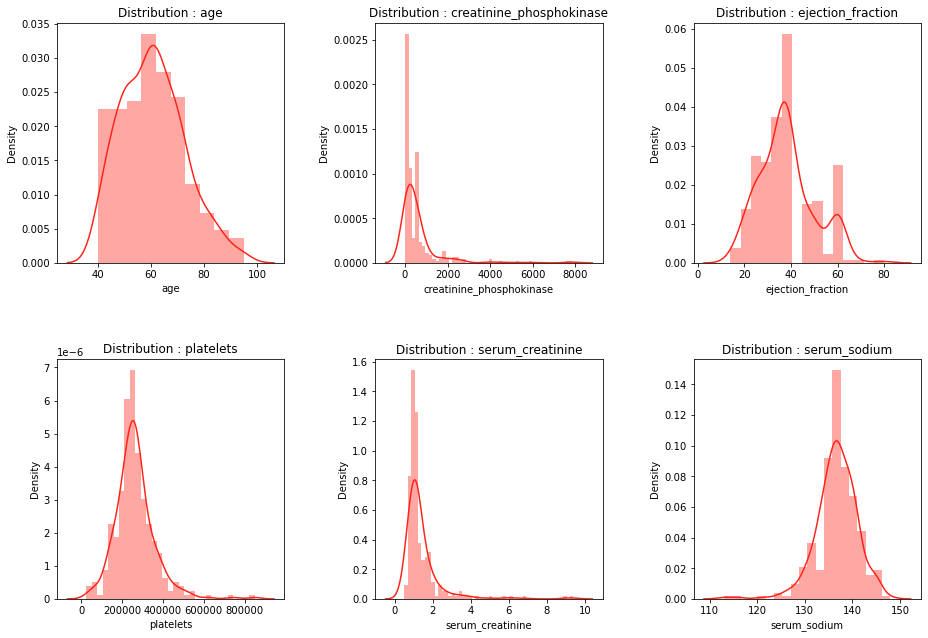

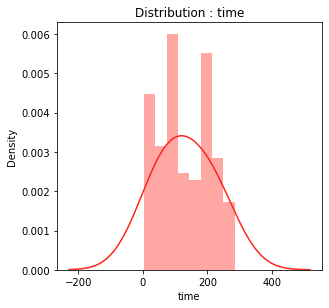

In [21]:
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(len(numerical_features) - 1):
    plt.subplot(2,3,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);



*   **Age,Creatinine_Phosphokinase,Ejection_Fraction** and **Serum_creatinine** have a rightly or positively skewed data distribution.
*  **Platelets** and **Serum_Sodium** are almost normally distributed.
*   **Time's** data distribution is similar to a typical **Time Series Analysis** graph with irregularities present in it.



### **Visualization of Target Variable (DEATH_EVENT)**

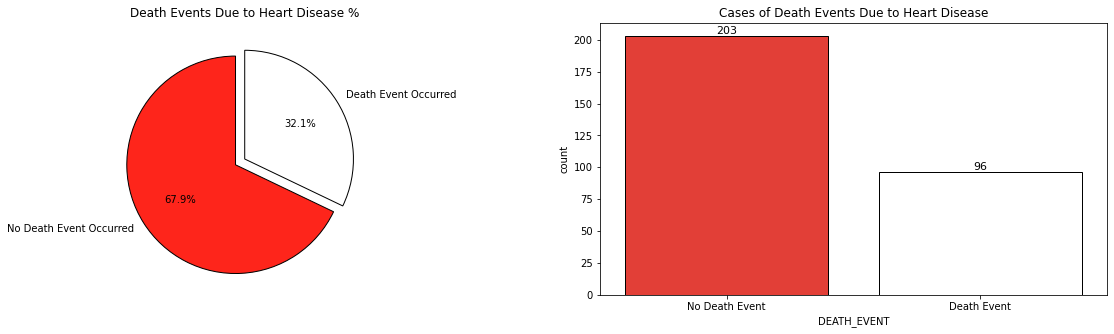

In [22]:
l = list(df['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot('DEATH_EVENT',data = df, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
plt.title('Cases of Death Events Due to Heart Disease');
plt.show()


*   The dataset is unbalanced with very low data points (299)!
*   2 : 1 ratio for No Death Event cases : Death Event cases!
*   Predictions and Visualizations will be biased towards No Death Event cases.

  



### **Categorical Features vs Target Variable (DEATH_EVENT)**

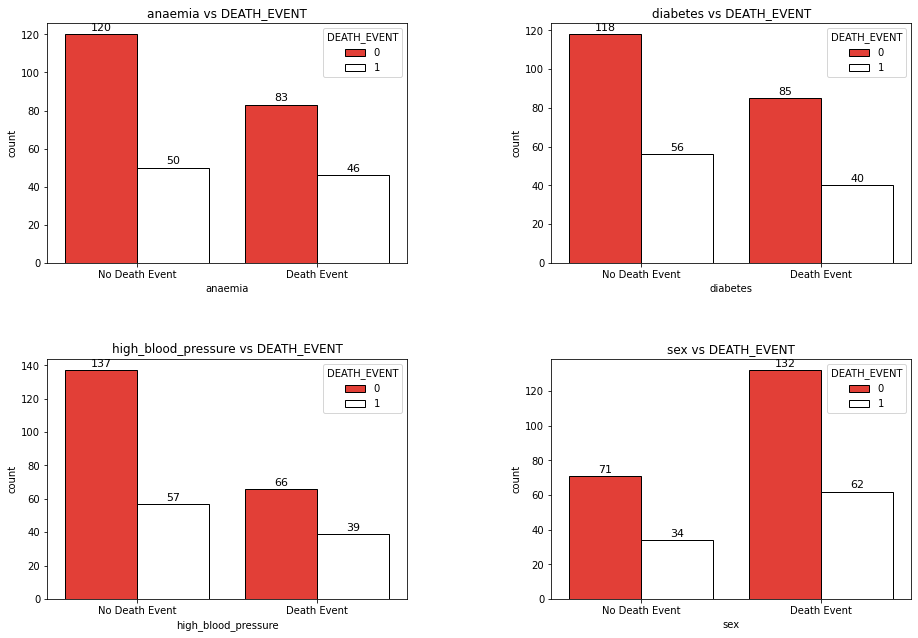

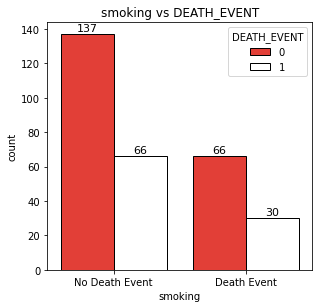

In [23]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(len(categorical_features) - 2):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = df,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(['No Death Event','Death Event'])
    title = categorical_features[i] + ' vs DEATH_EVENT'
    plt.title(title);
    
plt.figure(figsize = (4.75,4.55))
ax = sns.countplot(categorical_features[-2],data = df,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
title = categorical_features[-2] + ' vs DEATH_EVENT'
plt.title(title);

- All the graphs almost share the same pattern.
- According to the graphs, patients with negative cases of **anaemia**, **diabetes**, **high_blood_pressure** and **smoking**  leads to **DEATH_EVENT** more than the positive cases of these medical conditions.
- There are more cases of **male** population confronting a **DEATH_EVENT** due to heart failure than **female** population.

### **Categorical Features vs Cases of DEATH_EVENT**

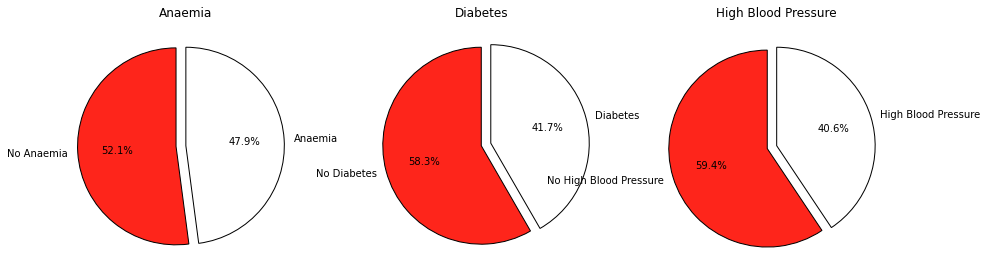

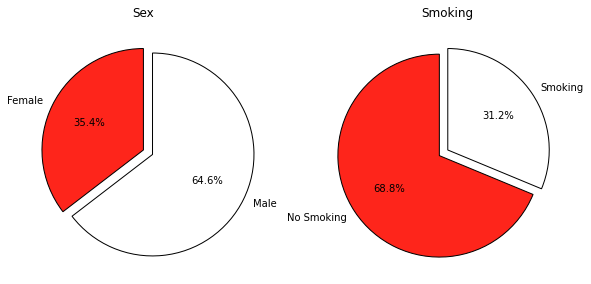

In [24]:
anaemia = df[df['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

diabetes = df[df['DEATH_EVENT'] == 1]['diabetes'].value_counts()
diabetes = [diabetes[0] / sum(diabetes) * 100,diabetes[1] / sum(diabetes) * 100]

hbp = df[df['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = df[df['DEATH_EVENT'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smoke = df[df['DEATH_EVENT'] == 1]['smoking'].value_counts()
smoke = [smoke[0] / sum(smoke) * 100,smoke[1] / sum(smoke) * 100]

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(anaemia,labels = ['No Anaemia','Anaemia'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(1,3,2)
plt.pie(diabetes,labels = ['No Diabetes', 'Diabetes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(1,3,3)
plt.pie(hbp,labels = ['No High Blood Pressure','High Blood Pressure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High Blood Pressure');

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(sex,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(1,2,2)
plt.pie(smoke,labels = ['No Smoking','Smoking'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');

- These piecharts support the case for more **DEATH_EVENT** due to negative cases of **anaemia**, **diabetes**, **high_blood_pressure** and **smoking** than their positive counterparts.
- Out of the total cases of heart failure leading to **DEATH_EVENT**, **males** are more prone to it than **females**. 

### **Numerical Features vs Target Variable (DEATH_EVENT)**

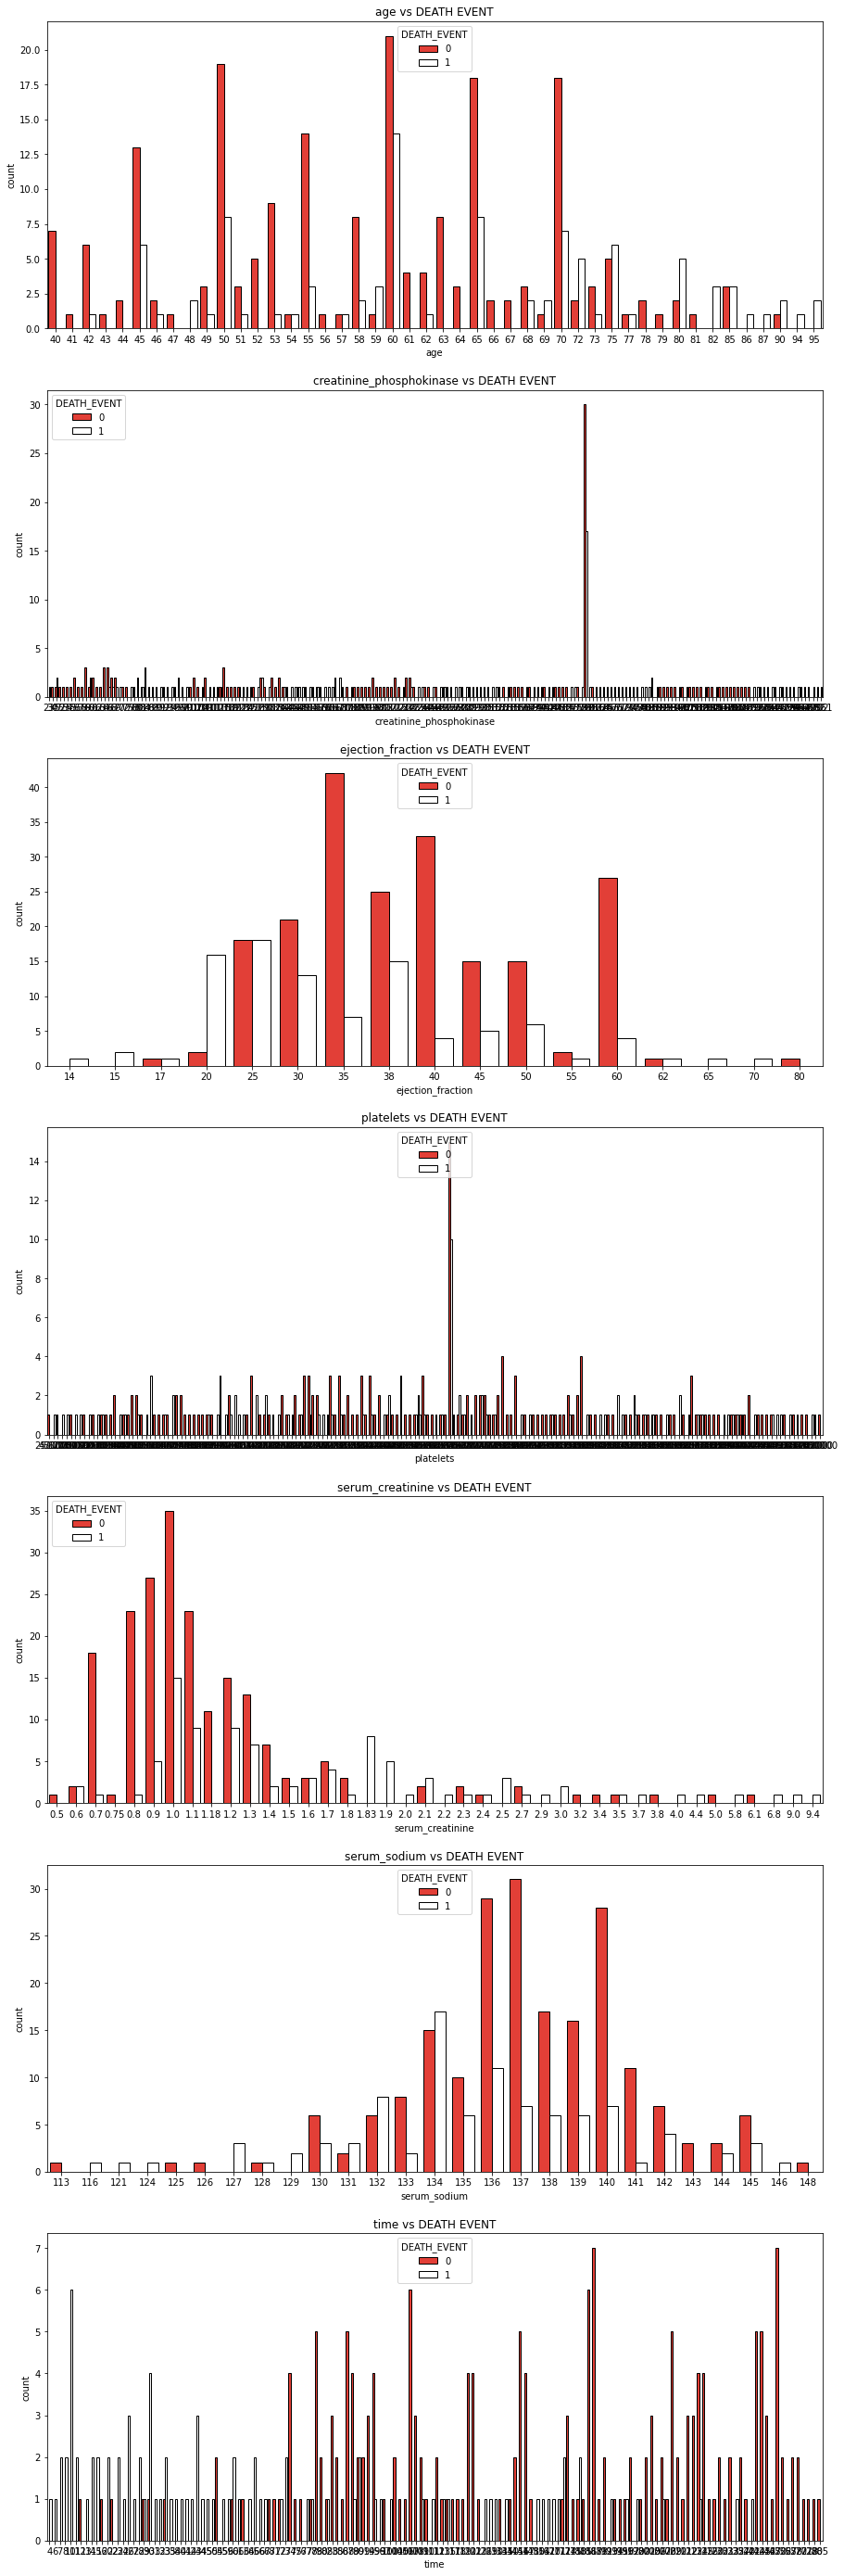

In [26]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (15,50),squeeze = False)
for i in range(len(numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(numerical_features[i],data = df,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    title = numerical_features[i] + ' vs DEATH EVENT'
    plt.title(title);

- Cases of **DEATH_EVENT** initiate from the age of **45**. Some specific peaks of high cases of **DEATH_EVENT** can be observed at 45, 50, 60, 65, 70, 75 and 80.
- High cases of **DEATH_EVENT** can be observed for **ejaction_fraction** values from **20 - 60**.
- **serum_creatinine** values from **0.6** to **3.0** have higher probability to lead to **DEATH_EVENT**.
- **serum_sodium** values **127 - 145** indicate towards a **DEATH_EVENT** due to heart failure.

- Because of too many unique data points in the **creatinine_phosphokinase**, **platelets** and **time** features, it is difficult to gain any type of insight. Thus, we will convert these features into categorical features for visualizations.
- We scale the data points of these features to a constant value that represents a range of values.(like mean)
- Here, we divide the data points constant value and assign its quotient value as the representative constant for that data point. The scaling constants are decided by looking into the data & intuition.


### **Comparing DEATH_EVENT and No DEATH_EVENT**

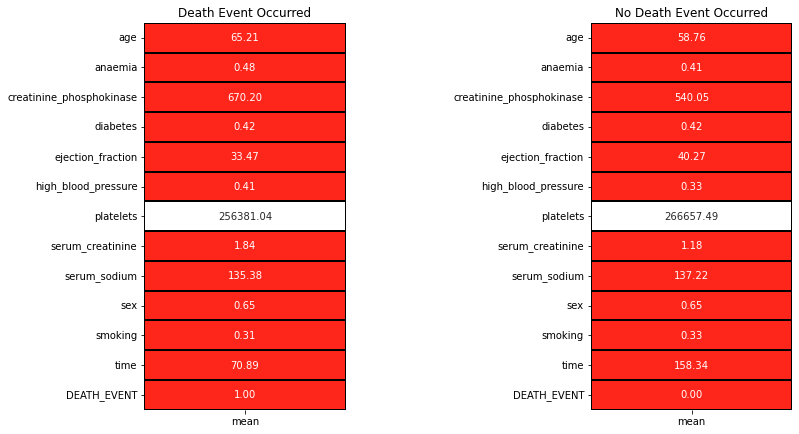

In [27]:
#Mean values of all the features for cases of DEATH_EVENT and No DEATH_EVENT.

yes = df1[df1['DEATH_EVENT'] == 1].describe().T
no = df1[df1['DEATH_EVENT'] == 0].describe().T

colors = ['#FE251B','#FFFFFF']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -3)
plt.subplots_adjust(left=0.1,right=1.9)